In [60]:
import mpl_style
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [61]:
plt.style.use(mpl_style.style1)

In [510]:
class RegimeFunctionBuilder():
    
    """Creates an object that contains the full predicition model from values collected at a single point along a trajectory
    Example - A CFD sim dataset (in csv format) containing information of temperature, pressure, velocity, and momentum at the 
    stagnation point. Create an object as object = RegimeFunctionBuilder(datasetname, regime)
    where the dataset name is a string
    type of the csv file, and the regime is an integer 1 or 2.
    
    For all points along a trajectory 35 km and above use regime 1, and anything below 35 km use regime 2.
    
    """
    
    def __init__(self, dataset, altitude):
        print("*---------------------------------------- Flowfield Approximation Model ----------------------------------------*")
        print()
        self.dataset = pd.read_csv(str(dataset))
        self.name = str(dataset)
        self.altitude = altitude
        
        if altitude >= 35:
            self.regime = 1
        else:
            self.regime = 2
            
            
    def _help(self):
        print(self.__doc__)
    


    def params(self):
        
        def mag_calc_vel():
            mag_list_vel = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Velocity Mag:0']
                v_y = self.dataset['Velocity Mag:1']
                v_z = self.dataset['Velocity Mag:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_vel.append(magnitude)
                
            return mag_list_vel
            
        def mag_calc_mom():
            mag_list_mom = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Momentum:0']
                v_y = self.dataset['Momentum:1']
                v_z = self.dataset['Momentum:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_mom.append(magnitude)
                
            return mag_list_mom
            
            
        self.v1 = mag_calc_vel()
        self.v2 = mag_calc_vel()
        self.m1 = mag_calc_mom()
        self.m2 = mag_calc_mom()
        self.t1 = self.dataset["Temperature"]
        self.t2 = self.dataset["Temperature"]
        self.p1 = self.dataset["Pressure"]
        self.p2 = self.dataset["Pressure"]
        
        self.x = self.dataset["Points:0"]
    
    def Temp_Regime_1(self):
        max_T1 = max(self.t1)
        #print(max_T1)
        val_T_Reg1 = (1.06e-9 * max_T1**3) - (4.251e-5 * max_T1**2) + (1.435 * max_T1) - 85.42
        return val_T_Reg1
    def Temp_Regime_2(self):
        max_T2 = max(self.t2)
        val_T_Reg2 = (7.327e-9 * max_T2**3) - (3.412e-4 * max_T2**2) + (4.954 * max_T2) - 943.9
        return val_T_Reg2
    
    def Press_Regime_1(self):
        max_P1 = max(self.p1)
        val_P_Reg1 = (2.879e-9 * max_P1**3) - (1.847e-4 * max_P1**2) + (7.401 * max_P1) - 49.0
        return val_P_Reg1
    def Press_Regime_2(self):
        max_P2 = max(self.p2)
        val_P_Reg2 = (5.873e-14 * max_P2**5) - (3.62e-9 * max_P2**4) + (8.115e-5 * max_P2**3) - (0.7849 * max_P2**2) + (3105 * max_P2) - 2.892e4
        return val_P_Reg2
    
    def MomMag_Regime_1(self):
        max_M1 = max(self.m1)
        val_M_Reg1 = (-0.206 * max_M1**3) + (2.325 * max_M1**2) - (0.9151 * max_M1) + 6.964
        return val_M_Reg1
    def MomMag_Regime_2(self):
        max_M2 = max(self.m2)
        val_M_Reg2 = (-58.27 * max_M2**3) + (368.8 * max_M2**2) - (161.7 * max_M2) + 318.9
        return val_M_Reg2
    
    
    def VelMag_Regime_1(self):
        max_V1 = max(self.v1)
        val_V_Reg1 = (6.521e-9 * max_V1**3) - (4.757e-5 * max_V1**2) + (0.9593 * max_V1) + 294.9
        return val_V_Reg1
    def VelMag_Regime_2(self):
        max_V2 = max(self.v2)
        val_V_Reg2 = (9.836e-8 * max_V2**3) - (1.04e-3 * max_V2**2) + (3.331 * max_V2) - 750.9
        return val_V_Reg2
    
    def CalcStagVals(self):
        
        if self.regime == 1:
            StagTempR1 = self.Temp_Regime_1()
            StagPressR1 = self.Press_Regime_1()                        
            StagVelR1 = self.VelMag_Regime_1()                        
            StagMomR1 = self.MomMag_Regime_1()
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            list_x = list(self.x)
            print(StagMaxVal)
            StagIdX = list_p1.index(StagMaxVal)
            Stag_Coord = list_x[StagIdX]
#             StagXIdx_arr = np.array(self.p1)
#             print(StagXIdx_arr.shape())
            
            return StagTempR1, StagPressR1, StagVelR1, StagMomR1, StagIdX, Stag_Coord
            
        elif self.regime == 2:
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            print(StagMaxVal)
            StagIdX = list_p1.index(StagMaxVal)
            StagTempR2 = self.Temp_Regime_2()            
            StagPressR2 = self.Press_Regime_2()            
            StagVelR2 = self.VelMag_Regime_2()            
            StagMomR2 = self.MomMag_Regime_2()
            
            return StagTempR2, StagPressR2, StagVelR2, StagMomR2, StagIdx, Stag_Coord
            
        else:
            raise Exception('Regime should be 1 or 2, the given value was: {}'.format(self.regime))
            
            
    def PrintInfo(self):
        self.CalcStagVals()
        ValueTuple = self.CalcStagVals()
        str_Stag_idX = str(np.round(ValueTuple[5], decimals=2))
        str_StagTemp = str(np.round(ValueTuple[0], decimals=2))
        str_StagPress = str(np.round(ValueTuple[1], decimals=2))
        str_StagVel = str(np.round(ValueTuple[2], decimals=2))
        str_StagMom = str(np.round(ValueTuple[3], decimals=2))
        #print(ValueTuple)
        print("The selected dataset is {}".format(self.name))
        print("The stagnation point values for the given trajectory are: ")
        print("Stagnation point X coordinate - " + str_Stag_idX)
        print("Temperature - " + str_StagTemp + " K")
        print("Pressure - " + str_StagPress + " Pa")
        print("Velocity Magnitude - " + str_StagVel + " m/s")
        print("Momentum Magnitude - " + str_StagPress + " ")
        print("For a provided altitude of {}".format(self.altitude) + " km (regime {}".format(self.regime) + ")")
        
    def Predictor(self):
        TempTest, PressureTest, MomTest, VelTest = [], [], [], []
        StagCoord = self.CalcStagVals()
        #print(StagCoord)
        ValueTuple = self.CalcStagVals()
        Value_StagCoord = ValueTuple[5]
        x_coord = np.linspace(0, 1.5, len(self.dataset))
        #print(len(x_coord))
        
        
        def TempPredict(T, x):
            if x <= Value_StagCoord:
                TempScaled = ValueTuple[0]
                print(x)
            else:
                TempScaled = ((3796 * x**2) - (1.002e+04 * x) + ValueTuple[0])
            return TempScaled
                
        def PressPredict(P, x):
            if x <= Value_StagCoord:
                PressScaled = ValueTuple[1]
            else:
                PressScaled =  (1000000 * np.exp(-x / 40)) + ValueTuple[1]
            return PressScaled
                
        def VelPredict(V, x):
            if x <= Value_StagCoord:
                VelScaled = ValueTuple[2]
            else:
                VelScaled = ((-936.7 * x**2) + (1982 * x) + ValueTuple[2])
            return VelScaled
                
        def MomPredict(M, x):
            if x <= Value_StagCoord:
                MomScaled = ValueTuple[3]
            else:
                MomScaled = (-1453 * x**3) + (4096 * x**2) - (2424 * x) + ValueTuple[3]
            return MomScaled
        
        
        
        for i in range(0, len(self.x)):
            TempVal = TempPredict(ValueTuple[0], i)
            TempTest.append(TempVal)
            
            PressVal = PressPredict(ValueTuple[1], i)
            PressureTest.append(PressVal)
            
            VelVal = VelPredict(ValueTuple[2], i)
            VelTest.append(VelVal)
            
            MomVal = MomPredict(ValueTuple[3], i)
            MomTest.append(MomVal)
            
        print(TempTest)
            
        
#         for i in range(0, len(x_coord)):
#             if i <= Value_StagCoord:
#                 TempScaled = ValueTuple[0]
#                 PressScaled = ValueTuple[1]
#                 VelScaled = ValueTuple[2]
#                 MomScaled = ValueTuple[3]
#                 TempTest.append(TempScaled)
#                 PressureTest.append(PressScaled)
#                 VelTest.append(VelTest)
#                 MomTest.append(MomScaled)
                
#             else: 
#                 TempScaled = ((3796 * i**2) - (1.002e+04 * i) + ValueTuple[0])
#                 PressScaled =  (1000000 * np.exp(-i / 40)) + ValueTuple[1]
#                 VelScaled = ((-936.7 * i**2) + (1982 * i) + ValueTuple[2])
#                 MomScaled = (-1453 * i**3) + (4096 * i**2) - (2424 * i) + ValueTuple[3]
#                 TempTest.append(TempScaled)
#                 PressureTest.append(PressScaled)
#                 VelTest.append(VelTest)
#                 MomTest.append(MomScaled)
                
            
            
#             TempTest.append(TempScaled)
#             PressureTest.append(PressScaled)
#             VelTest.append(VelTest)
#             MomTest.append(MomScaled)
#             print(len(TempTest))
        return TempTest, PressureTest, VelTest, MomTest 



    def plot(self):
        plot_vals = self.Predictor()
        t_plot_vals = plot_vals[0]
        p_plot_vals = plot_vals[1]
        v_plot_vals = plot_vals[2]
        m_plot_vals = plot_vals[3]
        fig, ax = plt.subplots(2, 2)
        ax[0,0].plot(self.x, t_plot_vals)
        
        ax[0,1].plot(self.x, p_plot_vals)
        
        ax[1,0].plot(self.x, v_plot_vals)
        
        ax[1,1].plot(self.x, m_plot_vals)
                
            

In [511]:
def TempRegime1(T, x, StagCoord = 0.052608):
    TStag = (1.06e-9 * T**3) - (4.251e-5 * T**2) + (1.435 * T) - 85.42
    scaleFac = TStag
#     if x > StagCoord and x < 0.2:
#         TempScaled = TempUnscaled * 0.73
#     elif x >= 0.2 and x < 0.4:
#         TempScaled = TempUnscaled * 0.53
#     elif x >= 0.4 and x < 0.6:
#         TempScaled = TempUnscaled * 0.37
#     else:
#         TempScaled = TempUnscaled * 0.24
    if x <= StagCoord:
        TempScaled = TStag
    
    else:
    
        TempScaled = ((3796 * x**2) - (1.002e+04 * x) + TStag) 
    
    return TempScaled

In [512]:
extrapolate_run2 = pd.read_csv('TestCase2_Extrapolate.csv')
extrapolate_run3 = pd.read_csv('TestCase3_Extrapolate.csv')
extrapolate_run4 = pd.read_csv('TestCase4_Extrapolate.csv')
extrapolate_run5 = pd.read_csv('TestCase5_Extrapolate.csv')
extrapolate_run6 = pd.read_csv('TestCase6_Extrapolate.csv')
extrapolate_run2_p = extrapolate_run2['Pressure']
extrapolate_run2_x = extrapolate_run2['Points:0']
# extrapolate_run2_m = mag_calc_mom(extrapolate_run2)
# extrapolate_run2_v = mag_calc_vel(extrapolate_run2)
extrapolate_run2_t = extrapolate_run2['Temperature']

In [513]:
# TempTest = []

# for i in range(0, len(extrapolate_run2_x)):
#     #print(i)
#     TempValue = TempRegime1(8000, extrapolate_run2_x[i], 0.05)
#     TempTest.append(TempValue)
# print(TempTest)
# print(len(extrapolate_run2_x))

In [514]:
FuncSet1 = RegimeFunctionBuilder("TestCase3_Extrapolate.csv", 80)


*---------------------------------------- Flowfield Approximation Model ----------------------------------------*



In [515]:

#FuncSet1.params()
#print(FuncSet1.PrintInfo())
#print(FuncSet1.__doc__)
FuncSet1.Predictor()


AttributeError: 'RegimeFunctionBuilder' object has no attribute 't1'

In [509]:
output = FuncSet1.Predictor()
print(output[0])

60022.0
60022.0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


60022.0
60022.0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


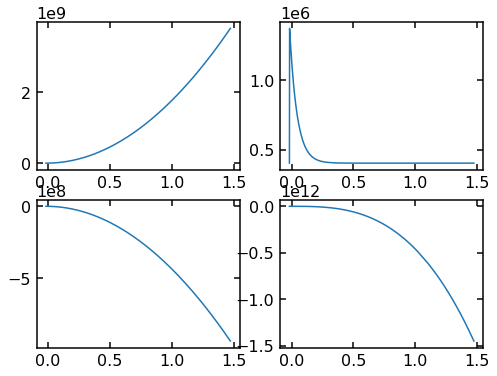

In [503]:
print(FuncSet1.plot())

In [478]:
dataset_name = (str(input("Input dataset name: ")))
                
altitude = int(input("Input altitude in km: "))
obj_name = str(input("Input name of predictor object: "))

KeyboardInterrupt: Interrupted by user

In [ ]:
print("Input option: ")
print("Help - 1")
print("Predict on your dataset - 2")

In [ ]:
choice = int(input("Input : "))

In [ ]:
obj_name = RegimeFunctionBuilder(dataset_name, altitude)
if choice == 1:
    print(FuncSet1.PrintInfo())